In [1]:
from idextraction import Id_Graph, InfluenceDiagram
from generate_nodes_and_edges import extract_node, extract_edge, generate_edge
import matplotlib.pyplot as plt
from model import Kimi
import json
from tqdm import tqdm

In [2]:
kimi = Kimi()
with open("./experiments/node/few_shot/prompts.json", "r", encoding="utf-8") as f:
    prompts = json.load(f)
with open("./experiments/edge/extraction/few_shot/prompts.json", "r", encoding="utf-8") as f:
    edge_prompts_ext = json.load(f)
with open("./experiments/edge/generation/few_shot/prompts.json", "r", encoding="utf-8") as f:
    edge_prompts_gen = json.load(f)
with open("./case_study/risky_decision/case.txt", "r", encoding="utf-8") as f:
    texts = f.readlines()

In [17]:
"For the following list of nodes, identify influence relations between the variables based on the text, and assign to each influential relation a corresponding conditional or unconditional probability. No cycles are allowed. For example, if the influence with condition 'a' to variable 'b' is present, there cannot be another influence with condition 'b' to variable 'a'. All conditions and variables should be members of the list: {node_list}.\n\nFor example, given nodes cold weather and respiratory diseases, in the sentence \nCold weather greatly increases the probability of respiratory diseases.\nthere is an edge, where cold weather is the condition, and respiratory diseases is the variable. When condition cold weather is present, the probability of respiratory diseases occuring is high; the rationale is then transformed into a nested dictionary.\n\nOutput using the following format: \n{format_instructions}\n\nThe content should be in Chinese if the text is in Chinese.\n\ntext: {text}"

[{'n_shots': 1,
  'prompt': "For the following list of nodes, identify influence relations between the variables based on the text, and assign to each influential relation a corresponding conditional or unconditional probability. No cycles are allowed. For example, if the influence with condition 'a' to variable 'b' is present, there cannot be another influence with condition 'b' to variable 'a'. All conditions and variables should be members of the list: {node_list}.\n\nFor example, given nodes cold weather and respiratory diseases, in the sentence \nCold weather greatly increases the probability of respiratory diseases.\nthere is an edge, where cold weather is the condition, and respiratory diseases is the variable. When condition cold weather is present, the probability of respiratory diseases occuring is high; the rationale is then transformed into a nested dictionary.\n\nOutput using the following format: \n{format_instructions}\n\nThe content should be in Chinese if the text is i

In [3]:
node_lists=[]
for text in tqdm(texts):
    node_list = extract_node(
        text, kimi, extract_template=prompts[3]["prompt"])
    node_lists+=node_list
    
with open("./case_study/risky_decision/node.json", "w", encoding="utf-8") as f:
    json.dump(node_lists, f, ensure_ascii=False, indent=4)

100%|██████████| 1/1 [00:13<00:00, 13.14s/it]


In [4]:
with open("./case_study/risky_decision/node.json", "r", encoding="utf-8") as f:
    node_lists = json.load(f)

edge_lists_ext = []
for text in tqdm(texts):
    edge_list_ext = extract_edge(text=text, chat_model=kimi, node_list=node_lists, extract_template=edge_prompts_ext[1]["prompt"])
    # print(edge_list)
    edge_lists_ext += edge_list_ext
with open("./case_study/risky_decision/edge_ext.json", "w", encoding="utf-8") as f:
    json.dump(edge_lists_ext, f, ensure_ascii=False, indent=4)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:39<00:00, 39.10s/it]


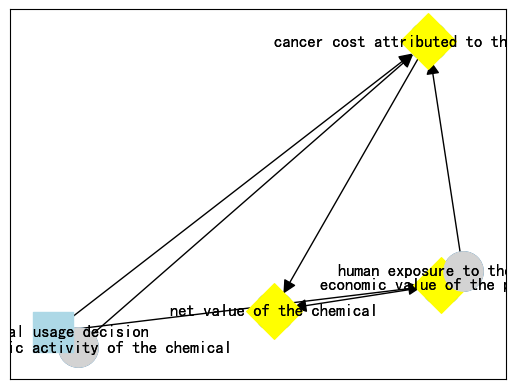

In [14]:
with open("./case_study/risky_decision/node.json", "r", encoding="utf-8") as f:
    node_lists = json.load(f)
with open("./case_study/risky_decision/edge_ext.json", "r", encoding="utf-8") as f:
    edge_lists = json.load(f)
diagram1 = InfluenceDiagram(node_lists, edge_lists)

graph1 = Id_Graph(diagram1.to_base_nodes(), diagram1.to_base_edges())

graph1.draw()

In [15]:
with open("./case_study/risky_decision/node.json", "r", encoding="utf-8") as f:
    node_lists = json.load(f)

edge_lists_gen = []
for text in tqdm(texts):
    edge_list_gen = generate_edge(chat_model=kimi, node_list=node_lists, generate_template=edge_prompts_gen[1]["prompt"])
    # print(edge_list)
    edge_lists_gen += edge_list_gen
with open("./case_study/risky_decision/edge_gen.json", "w", encoding="utf-8") as f:
    json.dump(edge_lists_gen, f, ensure_ascii=False, indent=4)

100%|██████████| 1/1 [01:15<00:00, 75.71s/it]


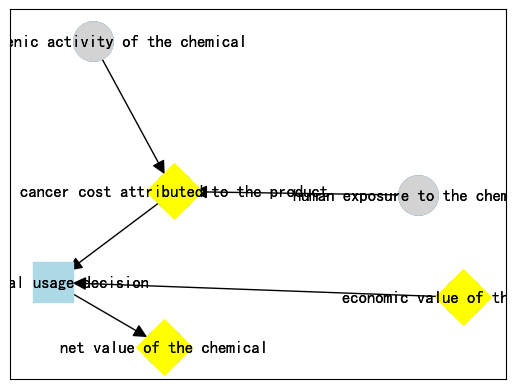

In [149]:
with open("./case_study/risky_decision/edge_gen.json", "r", encoding="utf-8") as f:
    edge_lists = json.load(f)
diagram2 = InfluenceDiagram(node_lists, edge_lists)

graph2 = Id_Graph(diagram2.to_base_nodes(), diagram2.to_base_edges())

graph2.draw()